# Module 6 Assignment


A few things you should keep in mind when working on assignments:

1. Run the first code cell to import modules needed by this assignment before proceeding to problems.
2. Make sure you fill in any place that says `# YOUR CODE HERE`. Do not write your answer anywhere else other than where it says `# YOUR CODE HERE`. Anything you write elsewhere will be removed or overwritten by the autograder.
3. Each problem has an autograder cell below the answer cell. Run the autograder cell to check your answer. If there's anything wrong in your answer, the autograder cell will display error messages.
4. Before you submit your assignment, make sure everything runs as expected. Go to the menubar, select Kernel, and Restart & Run all. If the notebook runs through the last code cell without an error message, you've answered all problems correctly.
5. Make sure that you save your work (in the menubar, select File → Save and CheckPoint).

-----

# Run Me First!

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from nose.tools import assert_equal, assert_almost_equal, assert_is_instance, assert_is_not
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
#Make sure the Dow Jones data is loaded in
df = pd.read_csv('./data/dow_jones_index.data')
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


# Problem 1: Create a boxplot of the opening stock price for a given stock.

In this problem you will create a boxplot to view the distribution of the opening price for a given stock from the Dow Jones dataset.

- Write a function called "open_boxplot" that takes in a DataFrame and the ticker name of a stock and outputs a boxplot of that stocks opening price.


- Use the seaborn module to create the boxplot.


- Give the plot a descriptive title.


- Give the plot a descriptive x-axis label.


- Do *NOT* give the plot a y-axis label.

In [3]:
def open_boxplot(df,ticker_name):
    '''
    A function which creates a boxplot of the opening price from the Dow Jones data.
        
    Parameters
    -------
    df: a pandas dataframe containing stock price data from the Dow Jones dataset
    
    ticker_name: the ticker name of the stock of interest
        
    Returns
    --------
    
    ax: a matplotlib axes object containing a boxplot of the stock's opening prices from the Dow Jones dataset    
    '''

    ### BEGIN SOLUTION###
    subset = df[df['stock']==ticker_name]
    ax = sns.boxplot(x=subset['open'])

    # Set x-axis length and label
    ax.set_xlabel('Price', fontsize=14)

    # Title the plot
    ax.set_title('Boxplot of opening Price')
    ###END SOLUTION###
    
    return ax

Below we again look at the stock for Alcoa Corp (ticker name: AA)

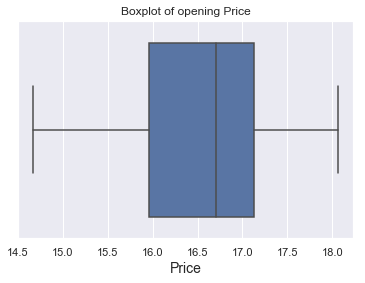

In [4]:
my_boxplot = open_boxplot(df,'AA')
plt.show()
plt.close()

In [5]:
assert_is_instance(my_boxplot, mpl.axes.Axes, msg='Return a matplotlib axes object.')  
assert_is_not(len(my_boxplot.title.get_text()), 0, msg="Your plot doesn't have a title.")
assert_is_not(my_boxplot.xaxis.get_label_text(), '', msg="Change the x-axis label to something more descriptive.")
assert_equal(my_boxplot.yaxis.get_label_text(), '', msg="The y-axis should not have a label.")
assert_equal(my_boxplot.get_data_ratio(),0.2681684097613303,
             msg="The function seems to be using the wrong ticker name")

# Problem 2:  Plot the distribution of days until next dividend

In this problem you will create a rugplot of days until next dividend for all the Dow Jones stocks in the dataset.

- Use the seaborn module to create the rugplot.


- Give the plot a descriptive title.


- Give the plot a descriptive x-axis label.


- Do *NOT* give the plot a y-axis label.

In [6]:
def rug_plot(df):
    '''
    A function which creates a rugplot of the days until next dividend from the Dow Jones data.
        
    Parameters
    -------
    df: a pandas dataframe containing stock price data from the Dow Jones dataset    
    
    Returns
    --------
    
    ax: a matplotlib axes object containing a rugplot of the days to next dividend for all stocks in the 
        Dow Jones dataset    
    '''
        
    ### BEGIN SOLUTION###
    #fig, ax = plt.subplots(figsize=(10, 1.5))
    #sns.rugplot(ax=ax, a=df['days_to_next_dividend'], height=0.25, lw=0.5, color = sns.xkcd_rgb["pale red"]) ;
    ax = sns.rugplot(a=df['days_to_next_dividend'], height=0.25, lw=0.5, color = sns.xkcd_rgb["pale red"]) ;
    #ax.set_yticks([])
    ax.set_xlabel('Days', fontsize=14)
    ax.set_title('Rug Plot (Days Until Next Dividend)', fontsize=14)
    # sns.despine(ax=ax, left=True, offset=2, trim=True)
    ### END SOLUTION###
    
    return ax

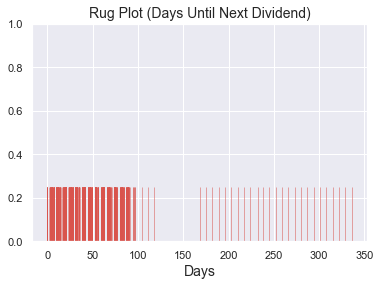

In [7]:
rp = rug_plot(df)
plt.show()
plt.close()

In [8]:
assert_is_instance(rp, mpl.axes.Axes, msg='Return a matplotlib axes object.')  
assert_is_not(len(rp.title.get_text()), 0, msg="Your plot doesn't have a title.")
assert_is_not(rp.xaxis.get_label_text(), '', msg="Change the x-axis label to something more descriptive.")
assert_equal(rp.yaxis.get_label_text(), '', msg="The y-axis should not have a label.")
assert_almost_equal(rp.get_data_ratio(),0.0027056, places=3,
            msg="The function is likely plotting the wrong data")

# Problem 3: Comparing Dow Jones index values


In this problem you will create a comparitive histogram to compare the distribution of the opening price of a stock and the distribution of the following weeks opening price of a stock.

- Create a 1-D comparative histogram (**side-by-side**) of the columns *open* and *next_weeks_open* from the Dow Jones dataset so that we can compare the current week's opening price to next week's opening price.

- Use default bin number(do not set bins).

- Create a label for the y-axis and the x-axis.

- Set a title for your plot.

- Create a legend so that we know which bars correspond to the current weeks open vs. next weeks open.




In [9]:
def plot_compare_hist(df):
    '''
    A function which plots a comparative histogram to compare the current weeks opening price and 
    the next weeks opening price from the Dow Jones data.
        
    Parameters
    -------
    df: a pandas dataframe containing stock price data from the Dow Jones dataset
        
    Returns
    --------
    
    ax: a matplotlib axes object containing a comparative histogram of the open colum and next_weeks_open column from
        the Dow Jones dataset    
    '''
        
    ### BEGIN SOLUTION
    fig, ax = plt.subplots()
    
    #ax.hist(df[['next_weeks_open','open']].as_matrix(), histtype='bar', label=('Open', 'Next Weeks Open'), alpha=0.5)
    ax.hist([df['next_weeks_open'],df['open']], histtype='bar', label=('Open', 'Next Weeks Open'), alpha=0.5)
    ax.legend(fontsize=14)

    ax.set_ylabel('Frequency', fontsize=14)
    ax.set_xlabel('Open Stock', fontsize=14)
    ax.set_title('Rug Plot (Days Until Next Dividend)', fontsize=14)
    ### END SOLUTION
    
    return ax

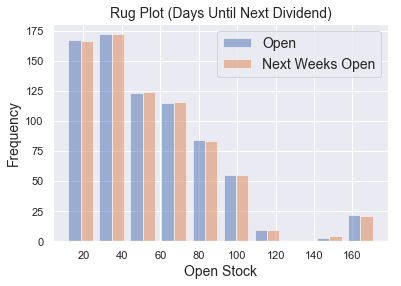

In [10]:
ch = plot_compare_hist(df)

In [11]:
assert_is_instance(ch, mpl.axes.Axes, msg='Return an axes object.')  
assert_is_not(len(ch.title.get_text()), 0, msg="Your plot doesn't have a title.")
assert_is_not(ch.xaxis.get_label_text(), '', msg="Change the x-axis label to something more descriptive.")
assert_is_not(ch.yaxis.get_label_text(), '', msg="Change the y-axis label to something more descriptive.")
assert_is_instance(ch.legend_, mpl.legend.Legend, msg="Your plot doesn't have a Legend")
assert_equal(ch.patches[0].get_bbox().get_points()[0][0],12.1359,
             msg="The number of bins may not be correct, or the function is using the wrong ticker name")
assert_equal(ch.patches[0].get_bbox().get_points()[1][0],18.5995,
             msg="The number of bins may not be correct, or the function is using the wrong ticker name")

# Problem 4:  Plot horizontal barplot on average stock volume

- Use the seaborn barplot function to plot a **horizontal** bar plot on average stock volume. The y-axis should be stock symbols and the x-axis is average trading volume.

- Set figsize to (10, 8)

- Use the seaborn module to create the barplot

- Turn off confidence interval line

- Give the plot a descriptive title


In [26]:
def plot_stock_volume(df):
    '''
    A  function to plot a horizontal bar plot on average stock volume. 
    
    Parameters
    -------
    df: a pandas dataframe containing stock price data from the Dow Jones dataset    
    
    Returns
    --------
    
    ax: a matplotlib axes object containing a barplot of the average stock volume    
    '''
    
    ### BEGIN SOLUTION###
    fig, ax = plt.subplots(figsize=(10, 10))
    ax = sns.barplot(x='volume', y='stock', data=df, ci=None)
    ax.set_title('Average Volume', fontsize=14)
    ### END SOLUTION###
    
    return ax

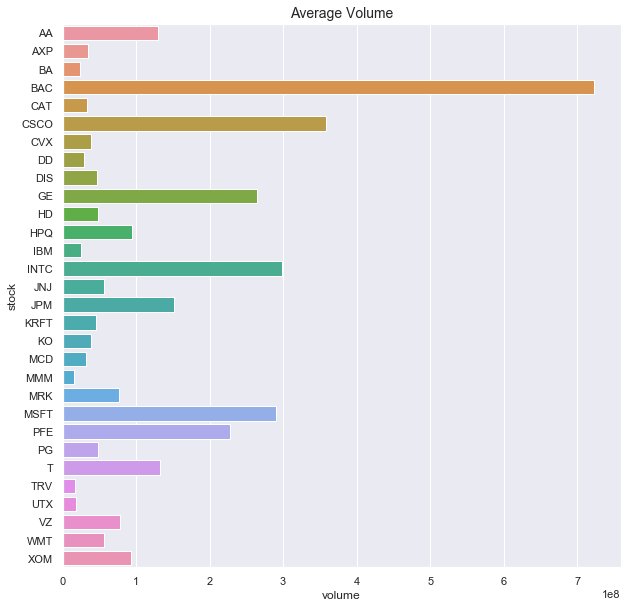

In [27]:
sv = plot_stock_volume(df)
plt.show()
plt.close()

In [14]:
assert_is_instance(sv, mpl.axes.Axes, msg='Return a matplotlib axes object.')  
assert_is_not(len(sv.title.get_text()), 0, msg="Your plot doesn't have a title.")
assert_almost_equal(sv.get_data_ratio(),3.9517929090328074e-08, places=3,
             msg="The function is plotting the wrong data or your plot is not a horizontal bar plot.")

# Problem 5: Comparing the current week's open to next week's open

Use matplotlib to plot scatter plot on open and next week's open for a particular stock.

- Create scatter plot on open and next week's open for a particular stock.

- The *open* variable should be on the x-axis.

- The *next week's open* variable should be on the y-axis.

- Create a label for the y-axis and the x-axis.

- Set a title for your plot


In [15]:
def plot_scatter_plot(df, ticker_name):
    '''
    A function which plots scatter plot on open and next week's open for a particular stock.
        
    Parameters
    -------
    df: a pandas dataframe containing stock price data
    ticker_name: stock to plot
    
    Returns
    --------
    
    ax: a matplotlib axes object containing a scatter plot
    '''
        
    ### BEGIN SOLUTION
    fig, ax = plt.subplots()

    # Plot data
    ax.scatter(df[df.stock==ticker_name].open, df[df.stock==ticker_name].next_weeks_open)

    # Set our axis labels and title
    ax.set_xlabel("Open price", fontsize=14)
    ax.set_ylabel("Next weeks open", fontsize=14)
    ax.set_title("Open and Next Weeks Open Price Comparison", fontsize=18)

    #sns.despine(offset=2, trim=True)
    ### END SOLUTION
    
    return ax

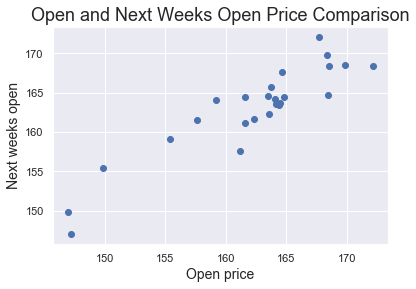

In [16]:
cb = plot_scatter_plot(df, 'IBM')

In [17]:
assert_is_instance(cb, mpl.axes.Axes, msg='Return a matplotlib axes object.')  
assert_is_not(len(cb.title.get_text()), 0, msg="Your plot doesn't have a title.")
assert_is_not(cb.xaxis.get_label_text(), '', msg="Change the x-axis label to something more descriptive.")
assert_is_not(cb.yaxis.get_label_text(), '', msg="Change the y-axis label to something more descriptive.")
assert_almost_equal(cb.get_data_ratio(),1, places=2,
             msg="The function is either plotting the wrong columns or wrong stock.")